In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

# Function to evaluate the entropy of a vector
# INPUTS
# - v: vector that contains in each cell the value of a byte (so from 0 to 255)
# - num: number of cells of the vector we want to consider in the analysis (from the first element)
# OUTPUT: entropy value
def entropy(v,num):
    freq = np.zeros(256)
    for i in range(num):
        freq[int(v[i])]=freq[int(v[i])]+1
    h = 0
    for i in range(256):
        if freq[i]>0:
            h = h+(freq[i]/num)*np.log2(freq[i]/num)
    h = -h
    return h

# Function to evaluate the entropy of a file as a function of the header lenght
# INPUTS
# - file: the file we want to anlyze (formats as an integer vector)
# - Bytes: total number of bytes we want to consider in the analysis
# OUTPUT: vector that contains the entropy values as a function of the header lenght analyzed
def entropy_analysis(file, Bytes):
    h_vector = np.zeros(int(Bytes/8)+1)
    for i in range(int(Bytes/8)+1):
        h_vector[i] = entropy(file,8*i)
    return h_vector

# Function to evaluate the Area (DDA approach) between two files 
# INPUTS
# - h_1,h_2: vectors obtained with entropy_analysis function
# OUTPUT: value of the area
def diff_area(h_1,h_2):
    area = 0
    length = min(len(h_1),len(h_2))
    diff_vec = np.zeros(length)
    for i in range(length):
        diff_vec[i]=abs(h_1[i]-h_2[i])
    sum = 0
    for i in range(2,length-2):
        sum = sum+2*diff_vec[i]
    area = (8/2)*(diff_vec[1]+diff_vec[len(h_1)-1]+sum)
    return area

# Function to transform the file of the dataset in a vector ready to be analyzed
# INPUTS
# - file: the file from the dataset we want to analyze
# - size: the size of the file we want to cut
# OUTPUT: file vector
def file_to_vector(file, size):
    vec = np.zeros(size)
    for i in range(size):
        vec[i] = int.from_bytes(bytes(file[i], 'latin-1'), byteorder="big")
    return vec

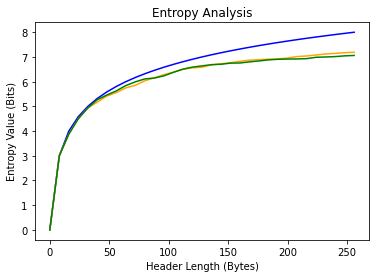

In [2]:
# Creation of an ideal file that will be used as reference for the maximum entropy achievable
ideal_file = np.zeros(256)
for i in range(len(ideal_file)):
    ideal_file[i]=i

# Creation of 2 pseudo random file
length_file = 1024
file_rand_1 = np.zeros(length_file)
file_rand_2 = np.zeros(length_file)
for i in range(length_file):
    file_rand_1[i]=randint(0,255)
    file_rand_2[i]=randint(0,255)

# Lenght of the header we want to analyze
header_length = 256
    
# X axis for the plot
x = np.zeros(int(header_length/8)+1)
for i in range(int(header_length/8)+1):
    x[i]= 8*i

# Evaluation of the Entropy-Analysis for the files we have created
h_ideal = entropy_analysis(ideal_file, header_length)
h_rand_1 = entropy_analysis(file_rand_1, header_length)
h_rand_2 = entropy_analysis(file_rand_2, header_length)

# Plot of the Entropy-Analysis of the 3 files created
plt.title("Entropy Analysis")
plt.xlabel("Header Length (Bytes)")
plt.ylabel("Entropy Value (Bits)")
plt.plot(x, h_ideal, color="blue")
plt.plot(x, h_rand_1, color="orange")
plt.plot(x, h_rand_2, color="green")

plt.show()

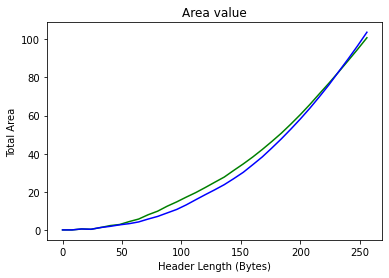

In [3]:
# Entropy-Analysis as a function of the Header-Length analyzed for the files created
area1 = np.zeros(33)
area2 = np.zeros(33)
for i in range(8,257,8):
    header_length = i
    h_ideal = entropy_analysis(ideal_file, header_length)
    h_rand_1 = entropy_analysis(file_rand_1, header_length)
    h_rand_2 = entropy_analysis(file_rand_2, header_length)
    area1[int(i/8)] = diff_area(h_ideal,h_rand_1)
    area2[int(i/8)] = diff_area(h_ideal,h_rand_2)

# Plot of the Area as a function of the Header Length analyzed for the two random file compared with the ideal file
plt.title("Area value")
plt.xlabel("Header Length (Bytes)")
plt.ylabel("Total Area")
plt.plot(x, area1, color="green")
plt.plot(x, area2, color="blue")

plt.show()

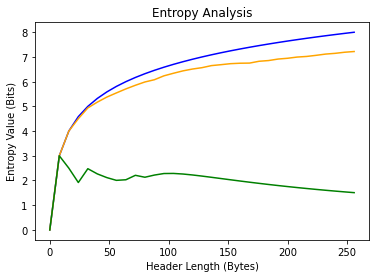

In [4]:
# Reading of the Encrypted (by a ransomware) file and the relative Decrypted file
f = open("./NapierOneDataset/EXTRA/RANSOMWARE-DHARMA-tiny/0001-doc.doc.id-0481FA80.[paymentbtc@firemail.cc].cmb", "r", encoding='latin-1')
file_encrypted = f.read()
f = open("./NapierOneDataset/DOC/DOC-tiny/0001-doc.doc", "r", encoding='latin-1')
file_normal = f.read()

# Transformation of the two files in a vector ready to be anlyzed
size = 1024
vector_file_normal = file_to_vector(file_normal,size)
vector_file_encrypted = file_to_vector(file_encrypted,size)

# Evaluation of the Entropy-Analysis for the two files
header_length = 256
h_file_encrypted = entropy_analysis(vector_file_encrypted, header_length)
h_file_normal = entropy_analysis(vector_file_normal, header_length)

# Plot of the Entropy-Analysis of the 2 files compared to the ideal file
plt.title("Entropy Analysis")
plt.xlabel("Header Length (Bytes)")
plt.ylabel("Entropy Value (Bits)")
plt.plot(x, h_ideal, color="blue")
plt.plot(x, h_file_encrypted, color="orange")
plt.plot(x, h_file_normal, color="green")

plt.show()

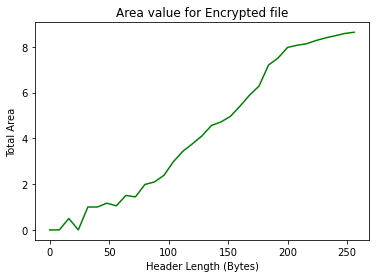

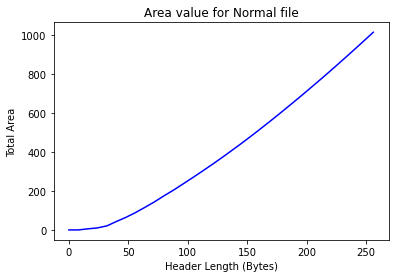

In [5]:
# Entropy-Analysis as a function of the Header Length for the files analyzed and for file_rand_1
area1 = np.zeros(33)
area2 = np.zeros(33)
for i in range(8,257,8):
    header_length = i
    h_encrypted = entropy_analysis(vector_file_encrypted, header_length)
    h_normal = entropy_analysis(vector_file_normal, header_length)
    h_rand = entropy_analysis(file_rand_1, header_length)
    area1[int(i/8)] = diff_area(h_encrypted,h_rand)
    area2[int(i/8)] = diff_area(h_normal,h_rand)

# Plot of the Area as a function of the Header Length analyzed between the two files and file_rand_1
plt.title("Area value for Encrypted file")
plt.xlabel("Header Length (Bytes)")
plt.ylabel("Total Area")
plt.plot(x, area1, color="green")
plt.show()

plt.title("Area value for Normal file")
plt.xlabel("Header Length (Bytes)")
plt.ylabel("Total Area")
plt.plot(x, area2, color="blue")
plt.show()